In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from wordcloud import STOPWORDS
import nltk
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd drive/MyDrive/Thesis/

/content/drive/MyDrive/Thesis


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Thesis/final_bn_data.csv')
df.head()

,category,headline,content,label
0,National,৮ দিনে ১৮ বিল পাস!,দশম জাতীয় সংসদের মেয়াদ শেষ হয়ে যাচ্ছে। কার্যত ...,0.0
1,Sports,আ’লীগের জনসভায় লোকে লোকারণ্য ফেনী ট্রাংক রোড,একাদশ জাতীয় সংসদ নির্বাচনকে সামনে রেখে সাংগঠনি...,0.0
2,National,মাদ্রাসায় জোড়া খুন: পরিচালক তিন দিনের রিমান্ডে,গাজীপুরে জোড়া খুন মামলার প্রধান আসামি মাদ্রাসা...,0.0
3,Sports,নেপালকে হারিয়ে গ্রুপ চ্যাম্পিয়ন বাংলাদেশ,সাফ অনূর্ধ্ব-১৮ নারী ফুটবল চ্যাম্পিয়নশিপে নেপা...,1.0
4,National,কুড়িগ্রামে ২ শিক্ষার্থীর লাশ উদ্ধার,কুড়িগ্রাম প্রতিনিধি : কুড়িগ্রাম সদর উপজেলার বে...,1.0


In [ ]:
df.isnull().sum()

category    0
headline    0
content     0
label       0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['headline'].str.len().mean()

44.289812203343196

In [ ]:
df['content'].str.len().mean()

1783.9534979706955

In [ ]:
df_real = df[df['label'] == 1]
df_fake = df[df['label'] == 0]
df_real = df_real.sample(frac=1).reset_index(drop=True)
df_fake = df_fake.sample(frac=1).reset_index(drop=True)

## Lexical Diversity of Fake News

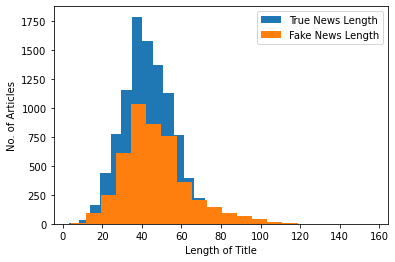

In [ ]:
plt.figure()
plt.hist(df_real['headline'].str.len(), bins= 20 ,Label= 'True News Length')
plt.hist(df_fake['headline'].str.len(), bins=20,stacked= True, Label= 'Fake News Length')
plt.legend()
plt.xlabel('Length of Title')
plt.ylabel('No. of Articles')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


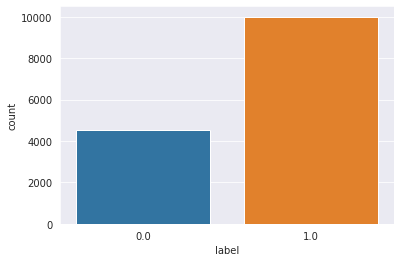

In [ ]:
sns.set_style("darkgrid")
sns.countplot(df['label']);

In [ ]:
pip install bnlp_toolkit

     |████████████████████████████████| 23.9MB 124kB/s 
     |████████████████████████████████| 1.2MB 44.1MB/s 
     |████████████████████████████████| 747kB 43.4MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
from bnlp.corpus import stopwords, punctuations, letters, digits
print(stopwords)
print(punctuations)
print(letters)
print(digits)

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে'

/usr/local/lib/python3.7/dist-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [ ]:
#wordcloud in real headline
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

import re
#ps = PorterStemmer()
corpus = []
for i in range(0, len(df_real)):
    review = re.sub(letters, ' ', (df_real['headline'][i]))
    #review = review.lower()
    #review = review.split()
    review = remove_stopwords(review, stopwords)

    #review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
df_real['headline'][9]

'দ্রুতই অস্কারে শর্টলিস্টে ঢুকবে বাংলাদেশের সিনেমা'

In [ ]:
corpus

['প্রবাসীদের টাকা খরচে দেশে পাঠানোর উদ্যোগ হয়েছে : অর্থমন্ত্রী',
 'জেনে নিন হ্যান্ডওয়াশে ক্ষতি ?',
 'গফরগাঁওয়ে জঙ্গিবাদবিরোধী মা সমাবেশ অনুষ্ঠিত',
 'গাজীপুর মহিলাদলের প্রতীকী অনশন',
 'স্ত্রী নির্যাতন মামলায় মানবাধিকার কর্মকর্তা কারাগারে',
 'মালয়েশিয়ার সাবেক প্রধানমন্ত্রীর স্ত্রী গ্রেফতার',
 'বিএসএমএমইউ - ভর্তি খালেদা জিয়া , মেডিক্যাল বোর্ড বসবে',
 '- পূর্ব ভারতে ভূমিকম্পের আঘাত',
 'হাফিজের শতকে পাকিস্তানের আধিপত্য ০৭ অক্টোবর , ২০১৮ ১৮ : ০৭',
 'দ্রুতই অস্কারে শর্টলিস্টে ঢুকবে বাংলাদেশের সিনেমা',
 'যেভাবে শেষ ওভারে ম্যাচ বের মুস্তাফিজ',
 'জাহাজ ‘ বাংলার জয়যাত্রা ’ দেশে পৌঁছেছে',
 'সপ্তাহের ভাগ্য পূর্ভাবাস ২৮ সেপ্টেম্বর , ২০১৮ ১০ : ১৭',
 'হাসপাতাল মুখ্য , সুচিকিৎসা চাই : ফখরুল',
 "' ডিজিটাল নিরাপত্তা আইন সমালোচনা দুঃখজনক '",
 'ডেঙ্গুতে আক্রান্ত ভারতী সিং',
 'শাহাদাতের ৮ উইকেট , বিশাল ব্যবধানে জয় ঢাকার',
 'কোটা বহালের দাবিতে ঢাকা - রাজশাহী মহাসড়ক অবরোধ',
 'জেলায় - জেলায় উন্নয়ন মেলা',
 'ক্যারিয়ার সেরা ব্যাটিংয়ে আরিফুলের ডাবল সেঞ্চুরি',
 'অর্থনীতিতে নোবেল উইলিয়াম নর্ডহাউস - পল এম রোমার',
 '.

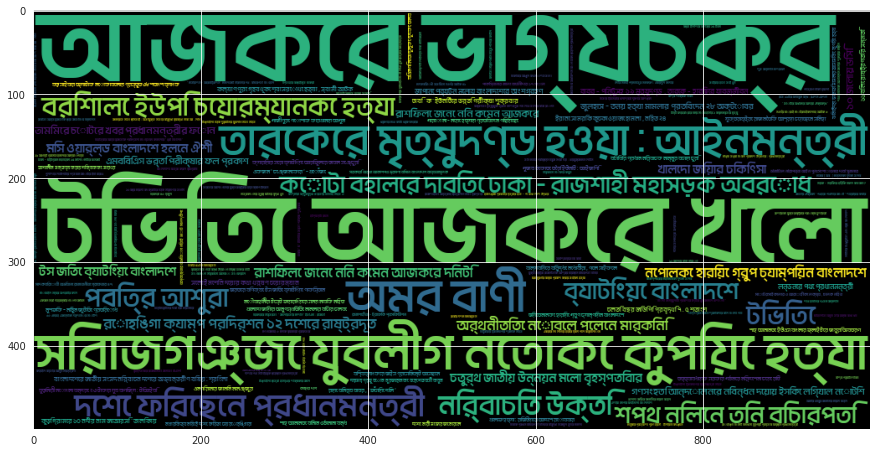

In [ ]:
from wordcloud import WordCloud
from collections import Counter
#word_cloud_dict=Counter(df[df['label'] == 0].headline)
word_cloud_dict=Counter(corpus)
#print(word_cloud_dict)
myfontpath='/content/drive/MyDrive/Thesis/Li Ador Noirrit Unicode.ttf'
wordcloud = WordCloud(font_path=myfontpath,width = 1000, height = 500).generate_from_frequencies(word_cloud_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

In [ ]:
#wordcloud in fake headline
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

import re
#ps = PorterStemmer()
corpus = []
for i in range(0, len(df_fake)):
    review = re.sub(letters, ' ', (df_fake['headline'][i]))
    #review = review.lower()
    #review = review.split()
    review = remove_stopwords(review, stopwords)

    #review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

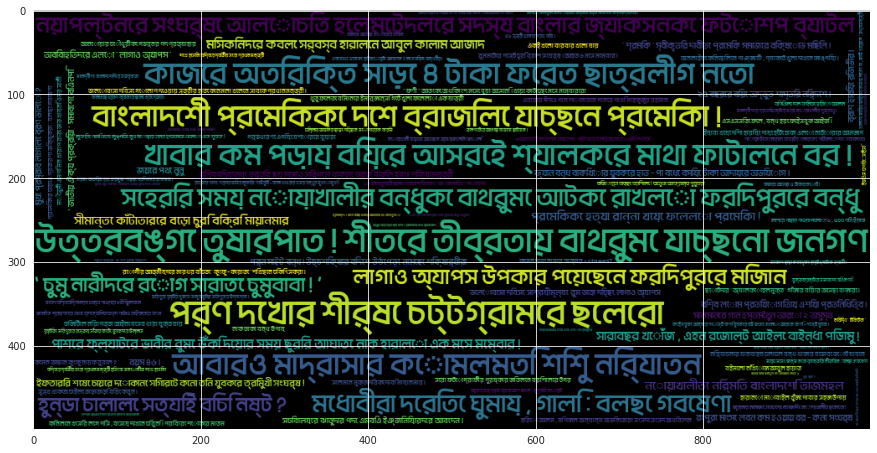

In [ ]:
from wordcloud import WordCloud
from collections import Counter
#word_cloud_dict=Counter(df[df['label'] == 0].headline)
word_cloud_dict=Counter(corpus)
#print(word_cloud_dict)
myfontpath='/content/drive/MyDrive/Thesis/Li Ador Noirrit Unicode.ttf'
wordcloud = WordCloud(font_path=myfontpath,width = 1000, height = 500).generate_from_frequencies(word_cloud_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)

In [ ]:
#wordcloud in real content
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

import re
#ps = PorterStemmer()
corpus = []
for i in range(0, len(df_real)):
    review = re.sub(letters, ' ', (df_real['content'][i]))
    #review = review.lower()
    #review = review.split()
    review = remove_stopwords(review, stopwords)

    #review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~।ঃ


In [ ]:
pip install inltk

In [ ]:
from bltk.langtools import UgraStemmer
from bltk.langtools import Tokenizer

text = df_real['headline'][0]

stemmer = UgraStemmer()
tokenizer = Tokenizer()
tokenized_text = tokenizer.word_tokenizer(text)

stem = stemmer.stem(tokenized_text)

print(f"Before stemming: {tokenized_text}")
print(f'After stemming: {stem}')

Before stemming: ['প্রবাসীদের', 'টাকা', 'বিনা', 'খরচে', 'দেশে', 'পাঠানোর', 'উদ্যোগ', 'নেওয়া', 'হয়েছে', ':', 'অর্থমন্ত্রী']
After stemming: ['প্রবাসীদ', 'টাকা', 'বিনা', 'খরচে', 'দেশে', 'পাঠানো', 'উদ্যোগ', 'নেওয়া', 'হয়', ':', 'অর্থমন্ত্রী']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator DictVectorizer from version 0.21.3 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.3 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator Pipeline from version 0.21.3 when using version 0.22.2.post1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
